In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Food_Delivery_Times.csv')

# Check column names to confirm
print("Columns:", df.columns.tolist())
print(df.head())

# Encode categorical columns: Traffic_Level and Weather
df_encoded = pd.get_dummies(df, columns=['Traffic_Level', 'Weather'], drop_first=True)

# Prepare features and target
feature_cols = ['Distance_km', 'Preparation_Time_min'] + \
    [col for col in df_encoded.columns if col.startswith('Traffic_Level_') or col.startswith('Weather_')]
X = df_encoded[feature_cols]
y = df_encoded['Delivery_Time_min']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Show coefficients
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(feature_cols, model.coef_):
    print(f"{name}: {coef}")

# Predict and evaluate performance
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print(f"\nR^2 score on test set: {r2_score(y_test, y_pred):.2f}")


Columns: ['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16              

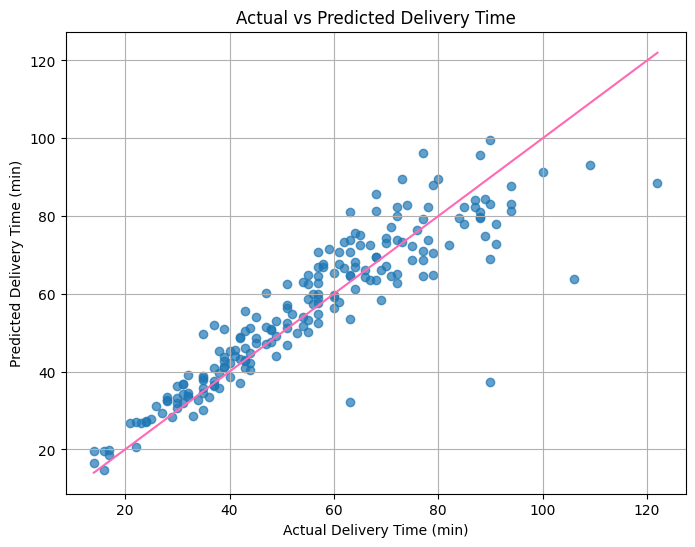

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.title('Actual vs Predicted Delivery Time')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='hotpink')  # perfect prediction line
plt.grid(True)
plt.show()
